# Diamond price prediction using KNN from scratch 

### Author  Cinthiya M ( DataScience  Intern )

Task - Predict the diamond price.💎
Write the KNN code from scratch and make it work on the given dataset ?

Step - 1: Load the data
Step - 2: Perform the EDA on the given dataset
Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)
Step - 4: Normalize the data
Step - 5: Split the data - Test and Train (recommended 75:25 split)
Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN.
Step - 7: Evaluate your model
Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation


In [23]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [3]:
#Generating preview and statistic of our data 
df = pd.read_csv("diamonds.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
#checking for null values in dataframe
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
#checking for duplicates and removing duplicate rows from dataframe
df.duplicated().sum()

146

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
#checking for unique value count 
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [9]:
#numerical column statistical description
df[['carat','depth','table','price','x','y','z']].describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Exploratory Data Analysis

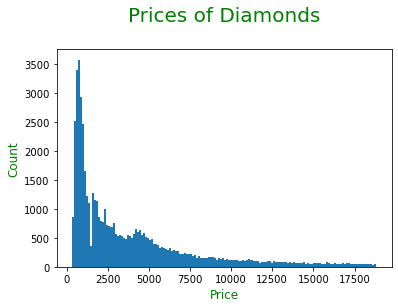

In [10]:
#Univarient analysis frequency plot for price of diamond

plt.hist(df['price'], bins = 150)
plt.title("Prices of Diamonds\n", fontdict={'fontsize': 20,'fontweight' : 20, 'color' : 'Green'})

plt.xlabel("Price", fontdict={'fontsize': 12,'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12,'color' : 'Green'})

plt.show()

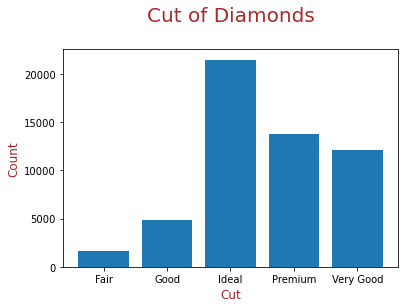

In [11]:
#variation on quality of cut

groupdata = df.groupby("cut").count()
groupdata

x = []
y = []
for i in [0, 1, 2, 3, 4]: 
    x.append(groupdata.index[i])
    y.append(groupdata.iloc[i,0])

plt.bar(x, y)

plt.title("Cut of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})

plt.xlabel("Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

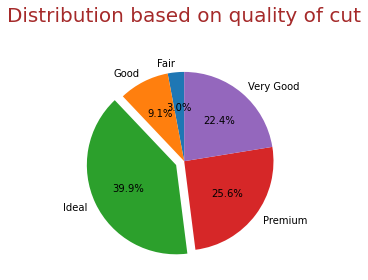

In [12]:
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'ideal')
plt.figure(figsize = [4,5])

plt.pie(y, explode=explode, labels=x, autopct='%1.1f%%', 
        textprops={'fontsize': 10, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

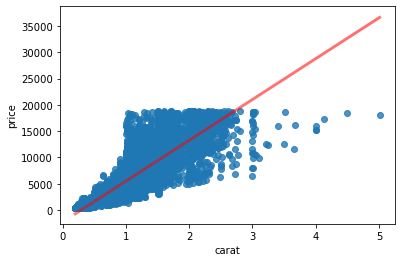

In [13]:
#Bivarient 

#Linear regression fit line
sns.regplot(x=df["carat"], y=df["price"], line_kws={"color":"r","alpha":0.5,"lw":3})
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

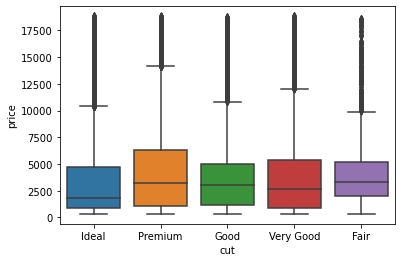

In [14]:
#Investigate the relationship of price with respect to the cut of the diamonds

sns.boxplot(x = 'cut', y = 'price', data = df)

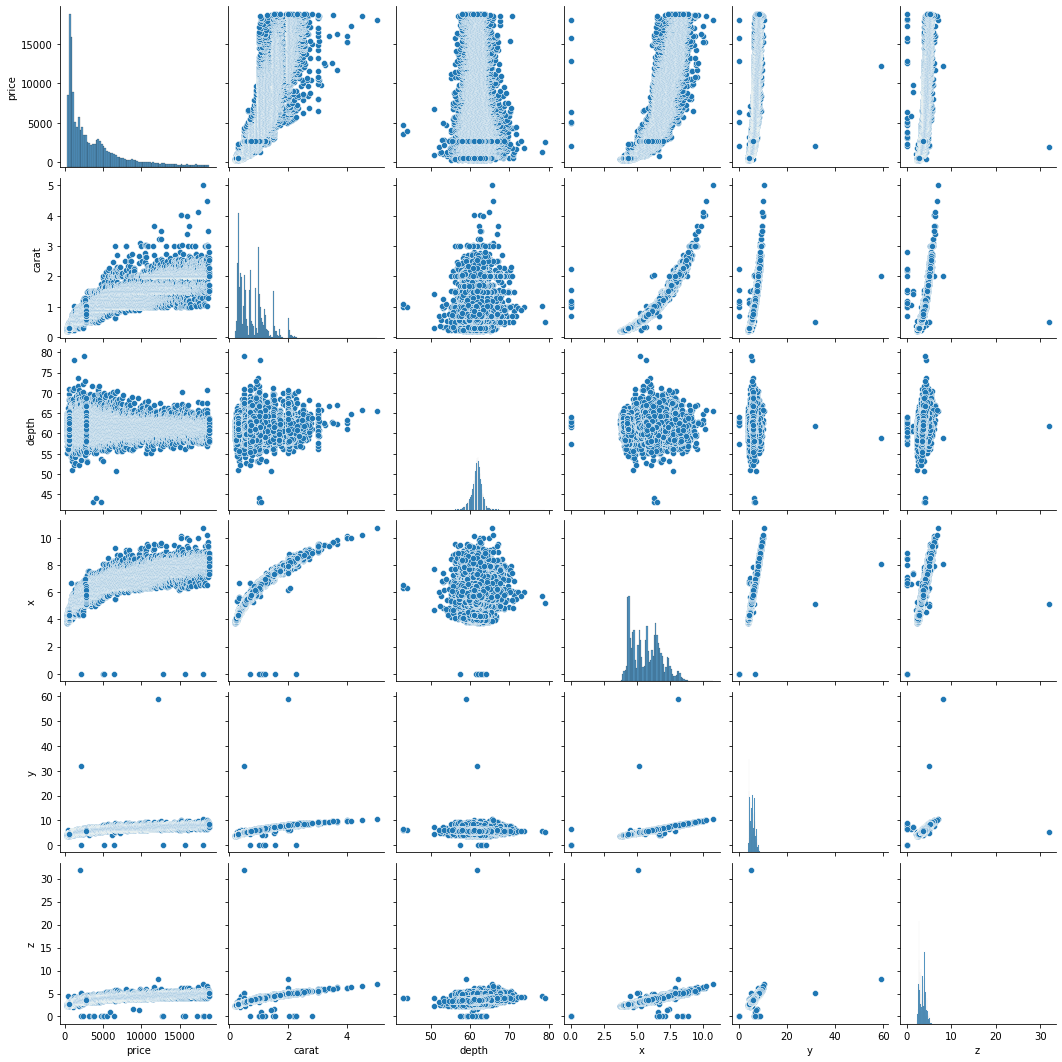

In [15]:
#pairwise relationship
sns.pairplot(df, vars = ['price','carat','depth','x','y','z'], height = 2.5)

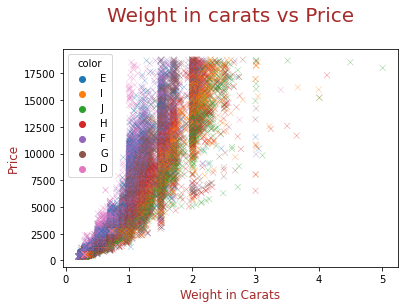

In [16]:
#Multipvarient analysis to show distribution among price respect to carat and color
ax =sns.scatterplot(x='carat',y='price', hue='color',alpha = 0.5, marker="x", data=df)

plt.title("Weight in carats vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.xlabel("Weight in Carats", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

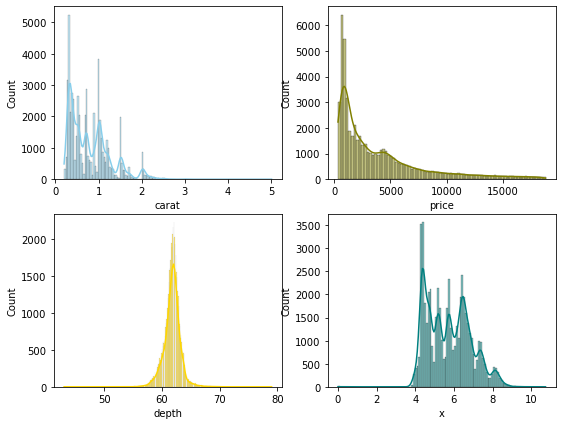

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(data=df, x="carat", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="price", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="depth", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="x", kde=True, color="teal", ax=axs[1, 1])

plt.show()

[]

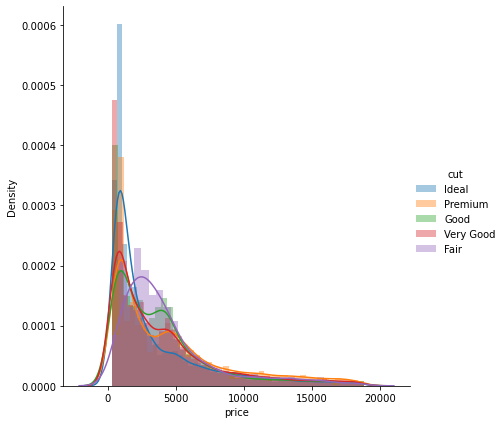

In [18]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

### KNN from Scratch

In [20]:
class KNearestNeighbors():
    def __init__(self,k):
        self.k = 1
        
    def train(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)
    
    def compute_distance(self ,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
    
        for i in range(num_test):
            for j in range(num_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return distances
    
    def predict_labels(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))
            
        return y_pred

### In main function implementing KNN from sklearn and checking accuracy of scratch and KNN

In [24]:
def main():
    
    df = pd.read_csv('diamonds.csv',nrows = 1000)
    
    label = LabelEncoder()
    
    df['cut'] = label.fit_transform(df['cut'].astype('str'))
    df['color'] = label.fit_transform(df['color'].astype('str'))
    df['clarity'] = label.fit_transform(df['clarity'].astype('str'))
    
    # Features
    X = df.drop('price',axis=1).values
    # Target Feature
    y = df['price'].values
    
    # Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None)
    
    # Scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fitting the Model
    KNN = KNearestNeighbors( k = 3 )
    KNN.train( X_train , y_train )
    
    # Prediction
    y_pred = KNN.predict(X_test)
    # Check Accuracy of Model
    print('Accuracy of the Scratch Model :',r2_score( y_test , y_pred ))
    
    # Fitting the Model by sklearn
    knn = KNeighborsRegressor( n_neighbors = 3 )
    knn.fit( X_train , y_train )
    y_pred_sklearn = knn.predict( X_test )
    
    # Check Accuracy of the sklearn Model
    print('Accuracy of the sklearn Model :',r2_score( y_test , y_pred_sklearn ))

In [25]:
if __name__ == '__main__' :
    main()

Accuracy of the Scratch Model : 0.9962336788662549
Accuracy of the sklearn Model : 0.9972266139861411
